# knn в pytorch

## Работа №1


---


ФИО: Першин-Милютин Эдуард Михайлович

Группа: 234-321



---



Далее в ноутбуке будут пропущенны части кода с комментариями о том что необходимо написать. А также текстовые ячейки с вопросами, на которые вам необходимо дать ответы.

## Импорт необходимых для работы модулей

In [1]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

# Настройки для графиков
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Загрузка и подготовка данных

In [2]:
# Загрузка обучающей и тестовой выборки
train_set = datasets.CIFAR10(
    root="data",
    train=True,
    download=True
)

test_set = datasets.CIFAR10(
    root="data",
    train=False,
    download=True
)

# Список классов этого датасета
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

100%|██████████| 170498071/170498071 [00:01<00:00, 87484794.12it/s] 


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
def extract_tensors(dataset):
  x = torch.tensor(dataset.data, dtype=torch.float32).permute(0, 3, 1, 2).div_(255)
  y = torch.tensor(dataset.targets, dtype=torch.int8)
  return x, y

# С помощью функции extract_tensors преобразуйте train_set и test_set.

(x_train, y_train) = extract_tensors(train_set)
(x_test, y_test) = extract_tensors(test_set)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([50000, 3, 32, 32])
torch.Size([50000])
torch.Size([10000, 3, 32, 32])
torch.Size([10000])


**Опишите что делает функция extract_tensors.**

Ваш ответ: Извлекает тензоры (для X меняет размер в определенном порядке: permute) и нормализует (деление на 255)

**Какие размерности у данных в обучающей и тестовой выборке? Сколько изображений в них, какого они размера и сколько в них каналов?**

Ваш ответ: <br/>
**в обучающей:** 50000 изображений, 32x32, 3 канала <br/>
**в тестовой:** 10000 изображений, 32x32, 3 канала

Выбирите одно из изображений в датасете и выведите его информацию по каналам, а также класс, к которому оно относится.

In [4]:
index = 0
img = x_train[index]
numClass = y_train[index]

frog


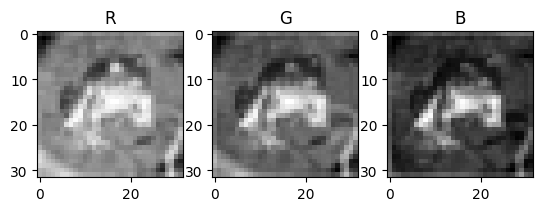

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img[0])  # отображение канала R
ax1.set_title("R")
ax2.imshow(img[1])  # отображение канала G
ax2.set_title("G")
ax3.imshow(img[2])  # отображение канала B
ax3.set_title("B")
fig.show()

print(classes[numClass])  # вывод класса

## Создание класса классификатора knn

Используя тензоры torch реализуйте алгоритм к-ближайших соседей.
Основные методы класса это fit для обучения модели и predict для предсказания индекса класса.

Чтобы при подборе количества соседей не создавать новые экземпляры класса их количество мы будем передавать при вызове метода predict.

В качестве метрики расстояния между иозбражениями реализуйте евклидово расстояние:

$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$

Если вам необходимы дополнительные методы для реализации алгоритма, то добавляйте их в класс.

Вам могут пригодится следующие методы:

- torch.stack
- torch.unsqueeze
- torch.sum
- torch.mean
- torch.mode
- torch.topk

In [24]:
class KnnClassifier:

    def fit(self, X, y):
      self.Xtr = X
      self.ytr = y

    def predict(self, samples, k):
      Ypred = torch.zeros(samples.shape[0])
      for i, sample in enumerate(samples):

        sample = sample.unsqueeze(0)
        distance = torch.sum((self.Xtr - sample)**2, 1)**0.5
        distance = distance.mean(dim = (1, 2))
        kmeans = torch.topk(distance, k, sorted = True, largest=False).indices.mode().values

        Ypred[i] = self.ytr[kmeans]
      return Ypred

**Опишите словами алгоритм работы knn.**

Ваш ответ:

**Какие еще бывают метрики расстояния?**

Ваш ответ:

## Создание экземпляра классификатора

Создайте и обучите ваш классификатор. Во время реализации вы можете использовать часть данных, чтобы меньше времени ожидать вычисления.

In [37]:
clf = KnnClassifier()

In [38]:
clf.fit(x_train, y_train)  # Обучите вашу модель

In [39]:
countOfTests = 50
res = clf.predict(x_test[:countOfTests], 3)  # Проверьте ее предсказания

## Оценка модели

Реализуйте оценку модели, которая покажет процент правильно предсказанных классов.

In [40]:
def score(y, y_ground):
  return int((torch.sum(torch.eq(y, y_ground))/y.shape[0])*100)

In [41]:
score(res, y_test[:countOfTests])  # Оцените качество работы вашей моделиq

28

## Подбор оптимального числа соседей

Попробуйте разное число соседей при предсказании вашей модели и выбирите количество соседей, которое дает наивысшую оценку.

Можно попробовать k = [1,3,5,7,9,11,15,20,30,40,50,60].

In [42]:
# реализуйте подбор параметра k

K = [1,3,5,7,9,11,15,20,30,40,50,60]
for k in K:
    res = clf.predict(x_test[:countOfTests], k)
    print("K:", k, ", Acc:", score(res, y_test[:countOfTests]),"%")

K: 1 , Acc: 32 %
K: 3 , Acc: 28 %
K: 5 , Acc: 24 %
K: 7 , Acc: 26 %
K: 9 , Acc: 24 %
K: 11 , Acc: 18 %
K: 15 , Acc: 22 %
K: 20 , Acc: 22 %
K: 30 , Acc: 18 %
K: 40 , Acc: 18 %
K: 50 , Acc: 18 %
K: 60 , Acc: 18 %


## Финальный результат

Теперь когда вы знаете оптимальное количество соседей для решения этой задачи методом к-ближайших соседей. Обучите модель на всех тренировочных данных и выведите итоговый результат работы для всех тестовых даных.

In [43]:
k=1
clf = KnnClassifier()
clf.fit(x_train, y_train)
result = clf.predict(x_test, k)
print("-----------------------------------------------")
print("K:", k, "acc:", score(result, y_test),"%")

-----------------------------------------------
K: 1 acc: 39 %


**Итоговая оценка работы модели**

Ваш ответ: